## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

## Import Libraries for Classifier Algorithms

In [85]:
from sklearn import svm  #Support Vector Machine
from sklearn.svm import SVC  #SVC for SVM
from sklearn.ensemble import AdaBoostClassifier  #Adaoost Classifier
from sklearn.tree import DecisionTreeClassifier  #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier

## Import Train and Test Dataset 

In [53]:
df = pd.read_csv("C:/Users/88013/Documents/train.csv")  #Train Dataset
df.head()

,visits,total_sales,credit_card,sales_product_category_1,sales_product_category_2,sales_product_category_3,sales_product_category_4,sales_product_category_5,sales_product_category_6,sales_product_category_7,...,stores_visited,phone_on_file,online_shopper,attempts,conversions,product_uniformity,days_between_visits,customer_type,returns,conversion
0,2,160.48,0,0.00,0.0,0.00,0.23,0.23,0.27,0.15,...,3,Y,0,4,0,23.30,31.33,37,0.13,0
1,19,1776.38,1,0.23,0.0,0.00,0.11,0.26,0.14,0.00,...,3,Y,1,5,5,20.19,13.27,12,0.04,1
2,3,156.97,1,0.17,0.0,0.00,0.00,0.00,0.75,0.00,...,1,Y,0,9,0,116.68,31.78,28,0.00,1
3,6,1419.36,1,0.39,0.0,0.03,0.04,0.15,0.12,0.07,...,5,Y,0,8,5,22.42,20.38,5,0.00,1
4,8,470.35,1,0.32,0.0,0.00,0.16,0.08,0.15,0.00,...,2,Y,0,10,0,17.16,27.33,15,0.18,0


In [54]:
test = pd.read_csv("C:/Users/88013/Documents/test.csv", index_col=0) #Test Dataset
test.head()

,visits,total_sales,credit_card,sales_product_category_1,sales_product_category_2,sales_product_category_3,sales_product_category_4,sales_product_category_5,sales_product_category_6,sales_product_category_7,...,individual_items,stores_visited,phone_on_file,online_shopper,attempts,conversions,product_uniformity,days_between_visits,customer_type,returns
Id,,,,,,,,,,,,,,,,,,,,,
0,1,213.74,1,0.16,0.00,0.00,0.17,0.00,0.41,0.00,...,5,1,Y,0,4,0,33.25,70.44,8,0.00
1,27,1190.16,1,0.10,0.03,0.07,0.00,0.12,0.05,0.05,...,114,5,Y,0,9,7,4.37,5.71,45,0.75
2,2,74.37,0,0.00,0.00,0.00,0.44,0.00,0.00,0.00,...,4,1,Y,0,0,0,35.41,34.50,42,0.00
3,1,386.98,1,0.51,0.00,0.05,0.00,0.17,0.00,0.12,...,10,1,Y,0,9,1,33.36,127.25,50,0.00
4,1,102.00,0,0.43,0.00,0.00,0.00,0.00,0.00,0.00,...,2,1,N,0,5,0,50.94,340.00,50,0.00


## Exploratory Data Analysis

In [55]:
print('The shape of our features is:', df.shape)

The shape of our features is: (4122, 44)


In [30]:
df.describe()

,visits,total_sales,credit_card,sales_product_category_1,sales_product_category_2,sales_product_category_3,sales_product_category_4,sales_product_category_5,sales_product_category_6,sales_product_category_7,...,individual_items,stores_visited,online_shopper,attempts,conversions,product_uniformity,days_between_visits,customer_type,returns,conversion
count,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,...,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000
mean,6.956332,615.731121,0.473799,0.212737,0.027491,0.039395,0.090651,0.129308,0.083170,0.069720,...,23.489811,2.701601,0.064047,5.243571,1.662300,33.186203,63.582572,15.102863,0.173329,0.438137
std,8.397925,838.773468,0.499374,0.214675,0.066313,0.098128,0.125246,0.162214,0.128239,0.124339,...,32.030137,1.873516,0.244866,3.588296,2.181073,26.076178,72.969527,12.018331,0.556889,0.496218
min,1.000000,4.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.750000,0.660000,0.000000,0.000000,0.000000
25%,2.000000,163.180000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,1.000000,0.000000,2.000000,0.000000,15.825000,17.472500,5.000000,0.000000,0.000000
50%,4.000000,349.960000,0.000000,0.170000,0.000000,0.000000,0.060000,0.070000,0.020000,0.000000,...,13.000000,2.000000,0.000000,6.000000,1.000000,24.920000,35.660000,11.000000,0.000000,0.000000
75%,9.000000,738.510000,1.000000,0.300000,0.030000,0.030000,0.130000,0.220000,0.130000,0.090000,...,29.000000,3.000000,0.000000,9.000000,3.000000,41.802500,77.180000,22.000000,0.150000,1.000000
max,81.000000,22511.490000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,689.000000,16.000000,1.000000,11.000000,11.000000,200.000000,363.000000,50.000000,14.510000,1.000000


In [31]:
df.isnull().sum()  #So, there is no missing value

visits                       0
total_sales                  0
credit_card                  0
sales_product_category_1     0
sales_product_category_2     0
sales_product_category_3     0
sales_product_category_4     0
sales_product_category_5     0
sales_product_category_6     0
sales_product_category_7     0
sales_product_category_8     0
sales_product_category_9     0
sales_product_category_10    0
sales_product_category_11    0
sales_product_category_12    0
sales_product_category_13    0
sales_product_category_14    0
sales_product_category_15    0
sales_store_1                0
sales_store_2                0
sales_store_3                0
sales_store_4                0
sales_last_3_months          0
sales_last_month             0
sales_last_6_months          0
sales_last_year              0
margin                       0
promos                       0
days_on_file                 0
days_between_purchases       0
markdown                     0
crossbuy                     0
coupons 

## Data Preprocessing 

### 1. Feature Selection

In [56]:
df = df.drop(columns=['phone_on_file'])  #Dropping the string type attribute

C:\Users\88013\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.05035042 0.02612789 0.02561019 0.0211245  0.02000173 0.01450436
 0.02017611 0.0185891  0.01803628 0.01849655 0.01783444 0.01894274
 0.01022702 0.00719042 0.01573144 0.01703907 0.01382286 0.01520043
 0.00548663 0.02154241 0.02210337 0.01334067 0.02180752 0.01313653
 0.02656426 0.01527941 0.0219452  0.03298127 0.03037271 0.02718397
 0.02073355 0.07048934 0.01794652 0.03157207 0.02040055 0.01294843
 0.02008977 0.02685551 0.02862089 0.11505032 0.02032804 0.0142155 ]


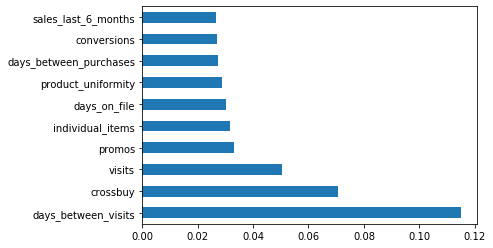

In [59]:
X = df.iloc[:,0:42]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


### 2. Train-Test Split

In [96]:
response ='conversion'  #Target Variable
predictors = ['days_between_visits', 'crossbuy', 'days_between_purchases', 'credit_card', 'visits', 'individual_items', 'product_uniformity', 'conversions', 'sales_last_6_months', 'promos']

X_train = df[predictors].to_numpy() 
Y_train = df[response].to_numpy()

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(df[predictors], df[response], random_state=0)

## Apply Models

### 1. Decision Tree

In [62]:
clf = DecisionTreeClassifier(max_depth = 5, 
                             random_state = 0)

In [63]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [64]:
# Predict for multiple observations
clf.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [65]:
#Measure Accuracy
score = clf.score(X_test, Y_test)
print(score)

0.7575169738118331


In [66]:
X_test = test[predictors].to_numpy()
y_prob = clf.predict(X_test)

In [67]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

                  feature  importance
0     days_between_visits       0.848
2  days_between_purchases       0.081
6      product_uniformity       0.024
4                  visits       0.021
9                  promos       0.014
5        individual_items       0.008
1                crossbuy       0.004
3             credit_card       0.000
7             conversions       0.000
8     sales_last_6_months       0.000


In [68]:
submission1 = pd.DataFrame(y_prob, index=test.index, columns=[response])

In [70]:
submission1.to_csv('decisionTree_final.csv')

### 2. Support Vector Machine (SVM)

In [80]:
clf = svm.SVC(gamma='scale')
clf.fit(X_train, Y_train)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
max_iter=-1, probability=False, random_state=None, shrinking=True,
tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
clf.predict(X_test)

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [82]:
score1 = clf.score(X_test, Y_test)
print(score1)

0.7361784675072744


In [83]:
submission2 = pd.DataFrame(y_prob, index=test.index, columns=[response])

In [84]:
submission2.to_csv('SVM_final.csv')

### 3. Random Forest Classifier

In [86]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
clf.fit(X_train, Y_train)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
            

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [87]:
y_prob = clf.predict(X_test)

In [88]:
score2 = clf.score(X_test, Y_test)
print(score2)

0.7390882638215325


In [89]:
X_test = test[predictors].to_numpy()
y_prob = clf.predict(X_test)

In [90]:
submission3 = pd.DataFrame(y_prob, index=test.index, columns=[response])

In [92]:
submission3.to_csv('RandomForest_final.csv')

### 4. Adaboost Classifier

In [98]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [99]:
clf.fit(X_train, Y_train)  
  

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [100]:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
learning_rate=1.0, n_estimators=100, random_state=0)
clf.feature_importances_  
y_prob = clf.predict(X_test)
clf.score(X_test, Y_test)

0.7691561590688651

In [101]:
X_test = test[predictors].to_numpy()
y_prob = clf.predict(X_test)

In [102]:
submission4 = pd.DataFrame(y_prob, index=test.index, columns=[response])

In [103]:
submission4.to_csv('ADABOOST_final.csv')